# Naive Bayes Theorem

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier  

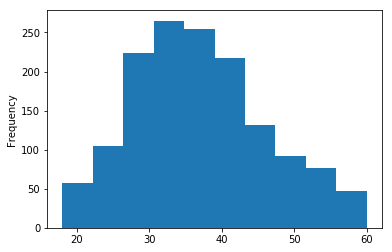

In [2]:
hr = pd.read_csv('HR Analytics.csv')

%matplotlib inline


hr['Age'].plot.hist()

In [3]:
bins = [0, 20, 40, 60 ,80]
np.digitize([-10], bins=bins)
np.digitize([100], bins=bins)
np.digitize([2], bins=bins)

hr['Age_bin']= np.digitize(hr['Age'], bins=bins)
hr[['Age','Age_bin']].head()

bin_labels = {x: 'B' + str(x) for x in range(6)} # this is done to change the dtype of column from numeriec to categorical
hr['Age_bin'] = hr['Age_bin'].replace(bin_labels) # as nave bayes only accepts categorical columns
hr[['Age', 'Age_bin']].head()

,Age,Age_bin
0,41,B3
1,49,B3
2,37,B2
3,33,B2
4,27,B2


In [4]:
# if we dont know the range of the column and we want to make bins out of it so we can divide columns into bins by taking the 
# quantiles of the column. 

bins = hr['Age'].quantile([0, 0.25, 0.5, 0.75, 1]).values


bin_labels = {x: 'B' + str(x) for x in range(len(bins))} # this is done to change the dtype of column from numeriec to categorical
hr['Age_bin']= np.digitize(hr['Age'], bins=bins)
hr['Age_bin'] = hr['Age_bin'].replace(bin_labels) # as nave bayes only accepts categorical columns
hr[['Age', 'Age_bin']].head()

,Age,Age_bin
0,41,B3
1,49,B4
2,37,B3
3,33,B2
4,27,B1


In [5]:
def numeric2category(num_series):
    bins = num_series.quantile([0, 0.25, 0.5, 0.75, 1]).values
    
    bin_labels = {x: 'B' + str(x) for x in range(len(bins)+1) }
    
    categories_array = np.digitize(num_series, bins=bins)
    
    category_series = pd.Series(categories_array)
    
    return (category_series.replace(bin_labels))
    
numeric2category(hr['Age'])    

0       B3
1       B4
2       B3
3       B2
4       B1
5       B2
6       B4
7       B2
8       B3
9       B3
10      B2
11      B1
12      B2
13      B2
14      B1
15      B1
16      B2
17      B1
18      B4
19      B3
20      B1
21      B3
22      B2
23      B1
24      B2
25      B4
26      B2
27      B3
28      B4
29      B4
        ..
1440    B3
1441    B4
1442    B1
1443    B3
1444    B4
1445    B3
1446    B2
1447    B3
1448    B3
1449    B2
1450    B2
1451    B3
1452    B4
1453    B3
1454    B4
1455    B3
1456    B2
1457    B3
1458    B2
1459    B1
1460    B1
1461    B4
1462    B3
1463    B2
1464    B1
1465    B3
1466    B3
1467    B1
1468    B4
1469    B2
Length: 1470, dtype: object

In [6]:
num_cols = hr._get_numeric_data().columns.drop('Attrition')

df_categories = pd.DataFrame(columns = num_cols)

for col in num_cols:
    df_categories[col] = numeric2category(hr[col])
    
#df_categories.head()


cat_cols = hr.columns.drop(num_cols)

df_final = pd.concat([df_categories, hr[cat_cols]], axis=1)
df_final

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime,Age_bin
0,B3,B3,B1,B2,B5,B1,B2,B4,B4,B3,...,1,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes,B3
1,B4,B1,B3,B1,B5,B1,B3,B2,B2,B3,...,0,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No,B4
2,B3,B4,B2,B2,B5,B1,B5,B4,B2,B2,...,1,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes,B3
3,B2,B4,B2,B4,B5,B1,B5,B2,B4,B2,...,0,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes,B2
4,B1,B2,B2,B1,B5,B1,B1,B1,B4,B2,...,0,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No,B1
5,B2,B3,B2,B2,B5,B1,B5,B3,B4,B2,...,0,Travel_Frequently,Research & Development,Life Sciences,Male,Laboratory Technician,Single,Y,No,B2
6,B4,B4,B2,B3,B5,B1,B3,B3,B5,B2,...,0,Travel_Rarely,Research & Development,Medical,Female,Laboratory Technician,Married,Y,Yes,B4
7,B2,B4,B4,B1,B5,B1,B5,B3,B4,B2,...,0,Travel_Rarely,Research & Development,Life Sciences,Male,Laboratory Technician,Divorced,Y,No,B2
8,B3,B1,B4,B3,B5,B1,B5,B1,B2,B4,...,0,Travel_Frequently,Research & Development,Life Sciences,Male,Manufacturing Director,Single,Y,No,B3
9,B3,B4,B4,B3,B5,B1,B3,B4,B4,B3,...,0,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No,B3


In [8]:
pd.pivot_table(data = df_final,
              index= 'Attrition',
               columns='Gender',
              values = 'MaritalStatus',
              aggfunc=np.count_nonzero)

Gender,Female,Male
Attrition,,
0,501,732
1,87,150


In [9]:
pd.pivot_table(data = df_final,
              index= 'Attrition',
               columns='MaritalStatus',
              values = 'Gender',
              aggfunc=np.count_nonzero)

MaritalStatus,Divorced,Married,Single
Attrition,,,
0,294,589,350
1,33,84,120


In [ ]:
np.random.seed(100)

In [10]:
from sklearn.naive_bayes import GaussianNB
df_model = pd.get_dummies(df_final)

train, test = train_test_split(df_model,
                              test_size = 0.3,
                              random_state=100)

train_x = train.drop('Attrition', axis=1)
train_y = train['Attrition']
test_x = test.drop('Attrition', axis=1)
test_y = test['Attrition']

model = GaussianNB()
model.fit(train_x, train_y)
test_pred = model.predict(test_x)
df_pred = pd.DataFrame({'actual': test_y,
                      'predicted': test_pred})
df_pred['pred_status'] = df_pred['actual'] == df_pred['predicted']
df_pred['pred_status'].sum() / df_pred.shape[0] * 100

54.87528344671202